# Imports and Setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


# Loading the Clean Data File

In [7]:
# Load the dataset
df = pd.read_csv('cleaned_energy_data.csv')

print(f"Data Loaded. Shape: {df.shape}")
df.head()

Data Loaded. Shape: (18481, 81)


,bill_amount,log_bill_amount,home_size,num_appliances,temp_hdd,temp_cdd,temp_degree_days,month_periods,state_postal_AL,state_postal_AR,...,IECC_climate_code_4B,IECC_climate_code_4C,IECC_climate_code_5A,IECC_climate_code_5B,IECC_climate_code_6A,IECC_climate_code_6B,IECC_climate_code_7A,IECC_climate_code_7AK,IECC_climate_code_7B,IECC_climate_code_8AK
0,1955.06,7.578176,2100,15.0,3844,1679,5523,1,False,False,...,True,False,False,False,False,False,False,False,False,False
1,713.27,6.569860,590,8.0,3766,1458,5224,1,False,True,...,False,False,False,False,False,False,False,False,False,False
2,334.51,5.812667,900,4.0,3819,1696,5515,5,False,False,...,True,False,False,False,False,False,False,False,False,False
3,1424.86,7.261829,2100,12.0,2614,1718,4332,1,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1087.00,6.991177,800,9.0,4219,1363,5582,1,False,False,...,False,False,False,False,False,False,False,False,False,False


# Feature Selection
* Target: bill_amount
* Features: home_size, num_appliances, temp_degree_days etc.



In [8]:
# Target variable
target = 'bill_amount'

# Select features
feature_cols = [
    'home_size', 
    'num_appliances', 
    'temp_degree_days', 
    'temp_cdd',         # Summer
    'temp_hdd',         # Winter
    'month_periods'     # Season
]

# Create X (Features) and y (Target)
X = df[feature_cols]
y = df[target]

print(f"Features selected: {feature_cols}")


Features selected: ['home_size', 'num_appliances', 'temp_degree_days', 'temp_cdd', 'temp_hdd', 'month_periods']


# Splitting and Scaling
* 80% for training
* 20% for testing
* Then scale it so algorithms work correctly.

In [9]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data, Normalizing range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and scaled.")


Data split and scaled.


# Defining Multiple Models

In [10]:
# Models to train
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}


# Training Loop & Evaluation
* This loop trains every model
* Predicts results on the test set
* Calculates accuracy metrics

In [11]:
print("Training models...\n")

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2, "Model Object": model}
    
    print(f"--- {name} ---")
    print(f"MAE (Avg Error): ${mae:.2f}")
    print(f"R² Score: {r2:.4f}")
    print("")


Training models...

--- Linear Regression ---
MAE (Avg Error): $536.17
R² Score: 0.2404

--- Decision Tree ---
MAE (Avg Error): $740.87
R² Score: -0.5001



/Users/toimur/Projects/ML-VTYS-Proje/ML-VTYS-Proje/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/toimur/Projects/ML-VTYS-Proje/ML-VTYS-Proje/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/toimur/Projects/ML-VTYS-Proje/ML-VTYS-Proje/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


--- Random Forest ---
MAE (Avg Error): $550.24
R² Score: 0.2055

--- Gradient Boosting ---
MAE (Avg Error): $524.97
R² Score: 0.2676

--- Gradient Boosting ---
MAE (Avg Error): $524.97
R² Score: 0.2676



# Visualizing Performance

/var/folders/ps/_khxq4251lgg3md5_4rtls_80000gn/T/ipykernel_32817/2740048083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")


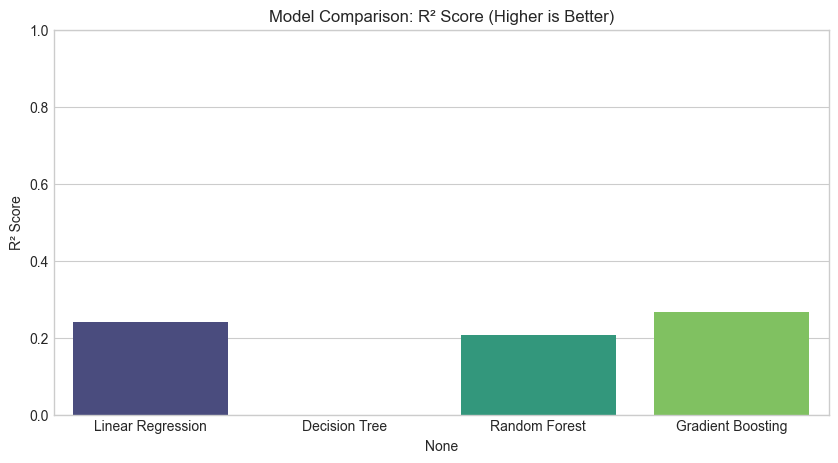

/var/folders/ps/_khxq4251lgg3md5_4rtls_80000gn/T/ipykernel_32817/2740048083.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MAE"], palette="magma")


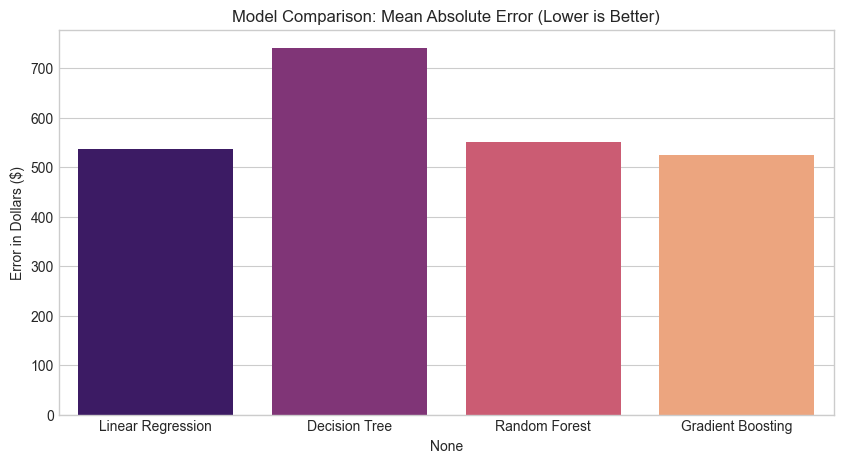

,MAE,RMSE,R2
Linear Regression,536.167529,730.262484,0.240381
Decision Tree,740.867295,1026.207112,-0.500056
Random Forest,550.244381,746.841314,0.205499
Gradient Boosting,524.969104,717.051033,0.267618


In [13]:
# Convert results to DataFrame for plotting
results_df = pd.DataFrame(results).T.drop("Model Object", axis=1)

# Plot R2 Score
# Higher is better
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R2"], palette="viridis")
plt.title("Model Comparison: R² Score (Higher is Better)")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.show()

# Plot MAE
# Lower is better
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["MAE"], palette="magma")
plt.title("Model Comparison: Mean Absolute Error (Lower is Better)")
plt.ylabel("Error in Dollars ($)")
plt.show()

display(results_df)


# Select and Save the Best Model
* This finds the best model based on the R² score
* Then saves it for my app.

In [14]:
# Identify best model
best_model_name = results_df["R2"].idxmax()
best_model = results[best_model_name]["Model Object"]
best_r2 = results[best_model_name]["R2"]

print(f"The best model is: {best_model_name} with R²: {best_r2:.4f}")

# Save the Best Model and Scaler
joblib.dump(best_model, 'energy_bill_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print(f"\nSuccessfully saved:")
print(f"1. Model: energy_bill_model.pkl")
print(f"2. Scaler: scaler.pkl")
print("\nThese files are ready for Flask backend.")


The best model is: Gradient Boosting with R²: 0.2676

Successfully saved:
1. Model: energy_bill_model.pkl
2. Scaler: scaler.pkl

These files are ready for Flask backend.


# Test Prediction
* simulating a "User Input"

In [16]:
# Load the saved model
loaded_model = joblib.load('energy_bill_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Simulate User Input from Frontend
# Define the feature names exactly as they were used during training
feature_names = ['home_size', 'num_appliances', 'temp_degree_days', 'temp_cdd', 'temp_hdd', 'month_periods']

# Create a DataFrame for the input (instead of a numpy array) to avoid warnings
# For Example: 1500 sqft home, 10 appliances, typical weather data
sample_input = pd.DataFrame([[1500, 10, 5000, 1500, 3500, 1]], columns=feature_names)

# Scale the input
sample_scaled = loaded_scaler.transform(sample_input)

# Predict
predicted_bill = loaded_model.predict(sample_scaled)

print(f"Input Home: 1500 sqft, 10 Appliances")
print(f"Predicted Electricity Bill: ${predicted_bill[0]:.2f}")

Input Home: 1500 sqft, 10 Appliances
Predicted Electricity Bill: $1310.15


In [17]:
weather_lookup = df.groupby('month_periods')[['temp_degree_days', 'temp_cdd', 'temp_hdd']].mean().to_dict('index')
print(weather_lookup)

{1: {'temp_degree_days': 5816.356385018535, 'temp_cdd': 1516.2217819250927, 'temp_hdd': 4300.134603093443}, 2: {'temp_degree_days': 5452.325102880658, 'temp_cdd': 1892.1604938271605, 'temp_hdd': 3560.1646090534978}, 3: {'temp_degree_days': 5112.060606060606, 'temp_cdd': 1688.2727272727273, 'temp_hdd': 3423.787878787879}, 4: {'temp_degree_days': 4837.25, 'temp_cdd': 1530.0, 'temp_hdd': 3307.25}, 5: {'temp_degree_days': 5732.673550436854, 'temp_cdd': 1545.897537728356, 'temp_hdd': 4186.7760127084985}}
